In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
LABELS = ["Normal","Fraud"]

In [3]:
dataset = pd.read_csv("creditcard.csv")

In [4]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [5]:
train_x, test_x = train_test_split(dataset, test_size=0.3, random_state=42)

train_x = train_x[train_x.Class == 0]       # where normal transactions
train_x = train_x.drop(['Class'], axis=1)   # drop the class column


test_y = test_x['Class'] # save the class column for the test set

test_x = test_x.drop(['Class'], axis=1)     # drop the class column

train_x = train_x.values                    # transform to ndarray
test_x = test_x.values                      # transform to ndarray
train_x

array([[-1.95225609e+00, -2.28956540e+00, -4.80259812e-01, ...,
         3.92241265e-01, -1.47756654e-01, -3.49231307e-01],
       [ 1.24006197e+00, -3.13716788e-01, -4.06434174e+00, ...,
        -2.90331333e-01,  1.10360002e-01,  4.42160499e+00],
       [ 5.19949707e-02, -1.80976314e+00, -5.67439077e-01, ...,
        -6.23851804e-02,  8.80786484e-02, -5.33729284e-02],
       ...,
       [-3.16265999e-01, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [-1.44938732e-01, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [-3.88157751e-01,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [6]:
input_dim = train_x.shape[1] #num of columns, 30

In [7]:
# input_layer = tf.keras.layers.Input(shape=(input_dim, ))

# #Encoder
# encoder = tf.keras.layers.Dense(14, activation="tanh")(input_layer)
# encoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
# encoder = tf.keras.layers.Dense(4, activation=tf.nn.leaky_relu)(encoder)

# # Decoder
# decoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
# decoder = tf.keras.layers.Dense(14, activation='relu')(decoder)
# decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# #Autoencoder
# autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
# autoencoder.summary()

autoencoder = keras.Sequential([
    keras.layers.InputLayer(shape=(input_dim,)),  # Define the input layer
    
    # Encoder
    keras.layers.Dense(14, activation="tanh"),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(4, activation='leaky_relu'),  # Leaky ReLU activation
    
    # Decoder
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(input_dim, activation='tanh')
])
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [9]:
history = autoencoder.fit(train_x, train_x,
                    epochs=10,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(test_x,test_x)
                    ).history
history

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.3247 - loss: 0.8847 - val_accuracy: 0.4161 - val_loss: 0.7546
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4248 - loss: 0.7247 - val_accuracy: 0.4245 - val_loss: 0.7275
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4264 - loss: 0.7019 - val_accuracy: 0.4179 - val_loss: 0.7139
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4171 - loss: 0.7032 - val_accuracy: 0.4129 - val_loss: 0.7061
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4179 - loss: 0.6749 - val_accuracy: 0.4162 - val_loss: 0.7007
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4169 - loss: 0.6752 - val_accuracy: 0.4153 - val_loss: 0.6965
Epoch 7/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4178 - loss: 0.6670 - val_accuracy: 0.4173 - val_loss: 0.6918
Epoch 8/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4220 - loss: 0.6812 - 

{'accuracy': [0.38534632325172424,
  0.4249778985977173,
  0.4253346621990204,
  0.4173249304294586,
  0.4166867733001709,
  0.41596317291259766,
  0.41669681668281555,
  0.4217267632484436,
  0.42043033242225647,
  0.41832488775253296],
 'loss': [0.8007218837738037,
  0.7228200435638428,
  0.7040963768959045,
  0.6922907829284668,
  0.6860522627830505,
  0.6816157102584839,
  0.6768973469734192,
  0.6710494160652161,
  0.6679361462593079,
  0.665588915348053],
 'val_accuracy': [0.41613706946372986,
  0.4244935214519501,
  0.4179394543170929,
  0.41294196248054504,
  0.4161956012248993,
  0.4153295159339905,
  0.41733086109161377,
  0.42100581526756287,
  0.42020997405052185,
  0.4180915951728821],
 'val_loss': [0.7545741200447083,
  0.727471649646759,
  0.7138841152191162,
  0.7060818672180176,
  0.7007451057434082,
  0.6964841485023499,
  0.6918190121650696,
  0.6864326596260071,
  0.6850603222846985,
  0.6827983260154724]}

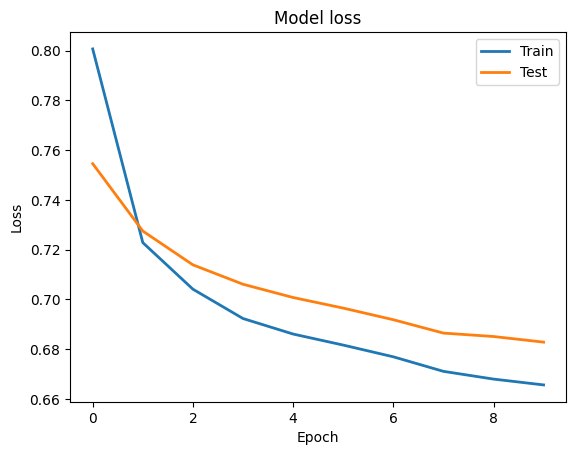

In [10]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [11]:
reconstructed_test_x = autoencoder.predict(test_x)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step


In [12]:
from sklearn.metrics import mean_squared_error

# Calculate reconstruction error for each sample
reconstruction_errors = [mean_squared_error(test_x[i], reconstructed_test_x[i]) for i in range(len(test_x))]
reconstruction_errors

[78.64066387798715,
 0.5681832469195366,
 0.18794942532403544,
 0.2995242680653446,
 0.139333775378104,
 0.9164042038513692,
 0.11653631988512629,
 0.34761638284087365,
 0.28311442061475733,
 1.80064296858521,
 0.21488974993851462,
 0.6352671915094225,
 0.30386122559275036,
 0.1696450413495685,
 0.6138888101768046,
 1.792530842765145,
 0.8633023449686306,
 0.8342451565195768,
 0.25472002041214553,
 0.9369819372527812,
 0.24476313116717524,
 0.3759858452076304,
 1.0274466267455868,
 0.6971097189435947,
 0.6846201029602471,
 0.4023978245568244,
 0.10900745562241397,
 0.44977181831305274,
 0.08000828504360764,
 0.9502096319794937,
 0.42095655100391766,
 1.5165528174014653,
 115.24380875050085,
 0.3119005390661999,
 0.11232966192158139,
 0.14897998820005573,
 0.2061194971019753,
 0.14726740329642338,
 0.315272921008471,
 0.3738908711006743,
 0.15511920586544176,
 1.8802051866444953,
 0.3835705709353123,
 0.2826367120784805,
 2.076319877877984,
 0.43542602379426487,
 0.2620023356463366,
 0.

In [13]:
threshold = 1.5

In [14]:
original_sample = test_x[1628]
reconstructed_sample = reconstructed_test_x[1628]
error = mean_squared_error(original_sample, reconstructed_sample)

# print("Original sample:", original_sample)
# print("Reconstructed sample:", reconstructed_sample)
# print("Reconstruction error:", error)
print("Predicted Label:", "Fraud" if error > threshold else "Normal")
print("Actual Label:", LABELS[test_y.iloc[1628]])


Predicted Label: Normal
Actual Label: Normal
